In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics 
from scipy import stats
from scipy.stats import entropy
# For text EDA
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LinearRegression, LogisticRegression
# from pyitlib import discrete_random_variable as drv
import statsmodels.api as sm
import datetime
from dateutil.relativedelta import relativedelta

# import warnings
# warnings.filterwarnings("ignore")

In [86]:
data = pd.read_csv('fraud_oracle.csv')
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [87]:
data.iloc[0:5, 0:15]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000


In [88]:
data.iloc[0:5, 15:]

,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


# EDA

### Response variable distribution

<Axes: xlabel='FraudFound_P'>

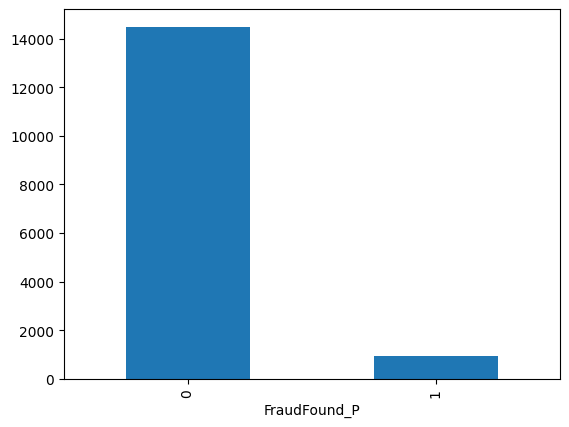

In [89]:
# Response variable distribution
data.groupby('FraudFound_P')['FraudFound_P'].count().plot.bar()

### Continuous variable

In [90]:
# Quantile statistics
quantile_stats = data.describe()['Age']
quantile_stats['range'] = quantile_stats['max'] - quantile_stats['min']
quantile_stats['IQR'] = quantile_stats['75%'] - quantile_stats['25%']
quantile_stats = pd.DataFrame(quantile_stats[['25%', '50%', '75%', 'max', 'min','range','IQR']])
quantile_stats

,Age
25%,31.0
50%,38.0
75%,48.0
max,80.0
min,0.0
range,80.0
IQR,17.0


In [91]:
# Descriptive Statistics
descriptive_stats = data['Age'].describe().loc[['mean', 'std', '50%']].transpose()
descriptive_stats.columns = ['mean', 'std', 'median']
descriptive_stats['mode'] = data['Age'].mode().transpose()[0]
descriptive_stats['mad'] = [stats.median_abs_deviation(data['Age'])]
descriptive_stats['kurtosis'] = [stats.kurtosis(data['Age'])]
descriptive_stats['skewness'] = [stats.skew(data['Age'])]
descriptive_stats

mean                    39.855707
std                     13.492377
50%                          38.0
mode                         30.0
mad                         [8.0]
kurtosis     [0.7980177842673362]
skewness    [0.15229923032888448]
Name: Age, dtype: object

Text(0.5, 1.0, 'Age: kurtosis: [0.8] skewness: [0.15]')

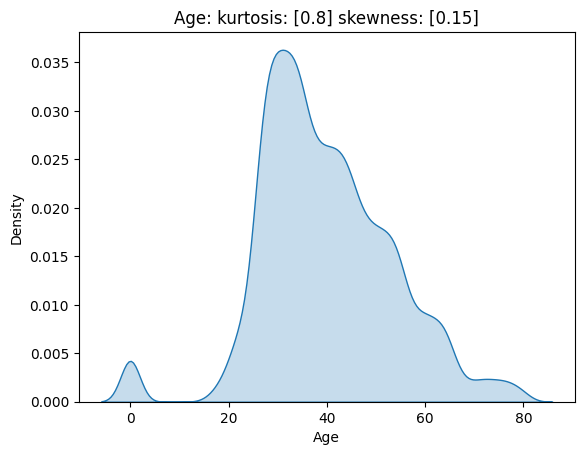

In [92]:
# Distribution histogram
var='Age'
sns.kdeplot(data['Age'], fill=True).set_title(f'{var}: kurtosis: {np.round(descriptive_stats["kurtosis"],2)} skewness: {np.round(descriptive_stats["skewness"],2)}')

In [93]:
# Change to average age
data = data

<Axes: >

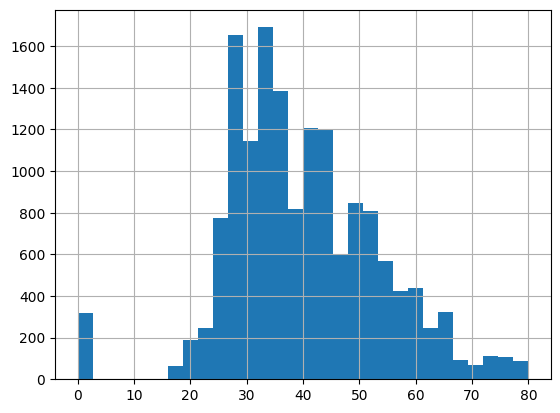

In [94]:
data['Age'].hist(bins=30)

# Abnormaly -> age = 0

### Continuous vs Categorical

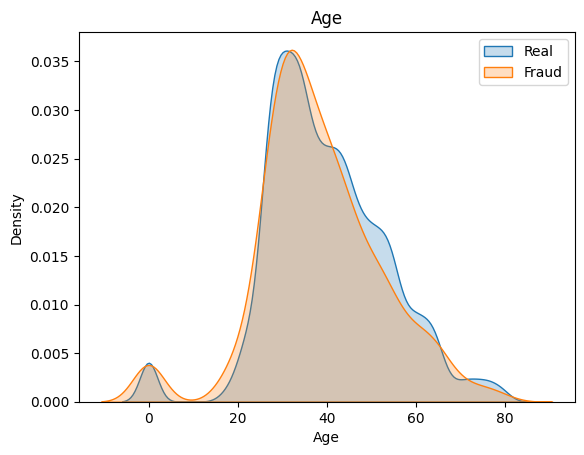

In [95]:
ax = plt.gca()
ax.set_title('Age')

sns.kdeplot(data[data['FraudFound_P']== 0]['Age'], fill=True)
sns.kdeplot(data[data['FraudFound_P']== 1]['Age'], fill=True)
ax.legend(['Real', 'Fraud']);

### Categorical variable

In [96]:
ordinal = ['Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Deductible', 'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year']

In [97]:
len(ordinal)

17

### Categorical (Ordinal) vs Continuous

In [98]:
# Don't use PolicyType
data.sample(10)[['VehicleCategory', 'PolicyType', 'BasePolicy']]

,VehicleCategory,PolicyType,BasePolicy
85,Utility,Utility - Liability,Liability
3370,Sedan,Sedan - Collision,Collision
12295,Sedan,Sedan - Collision,Collision
10112,Utility,Utility - All Perils,All Perils
10724,Sedan,Sedan - Collision,Collision
8059,Sedan,Sedan - Collision,Collision
131,Sedan,Sedan - Collision,Collision
10571,Sedan,Sedan - Collision,Collision
4408,Sport,Sedan - Liability,Liability
14738,Sedan,Sedan - All Perils,All Perils


In [99]:
# Don't use AgeOfPolicyHolder
data.sample(10)[['Age', 'AgeOfPolicyHolder']]

,Age,AgeOfPolicyHolder
10744,29,31 to 35
12473,29,31 to 35
7069,77,over 65
8406,60,51 to 65
757,33,31 to 35
12965,36,36 to 40
3792,31,31 to 35
8129,50,41 to 50
14261,22,26 to 30
9334,35,31 to 35


In [100]:
# number of days between accident and claim

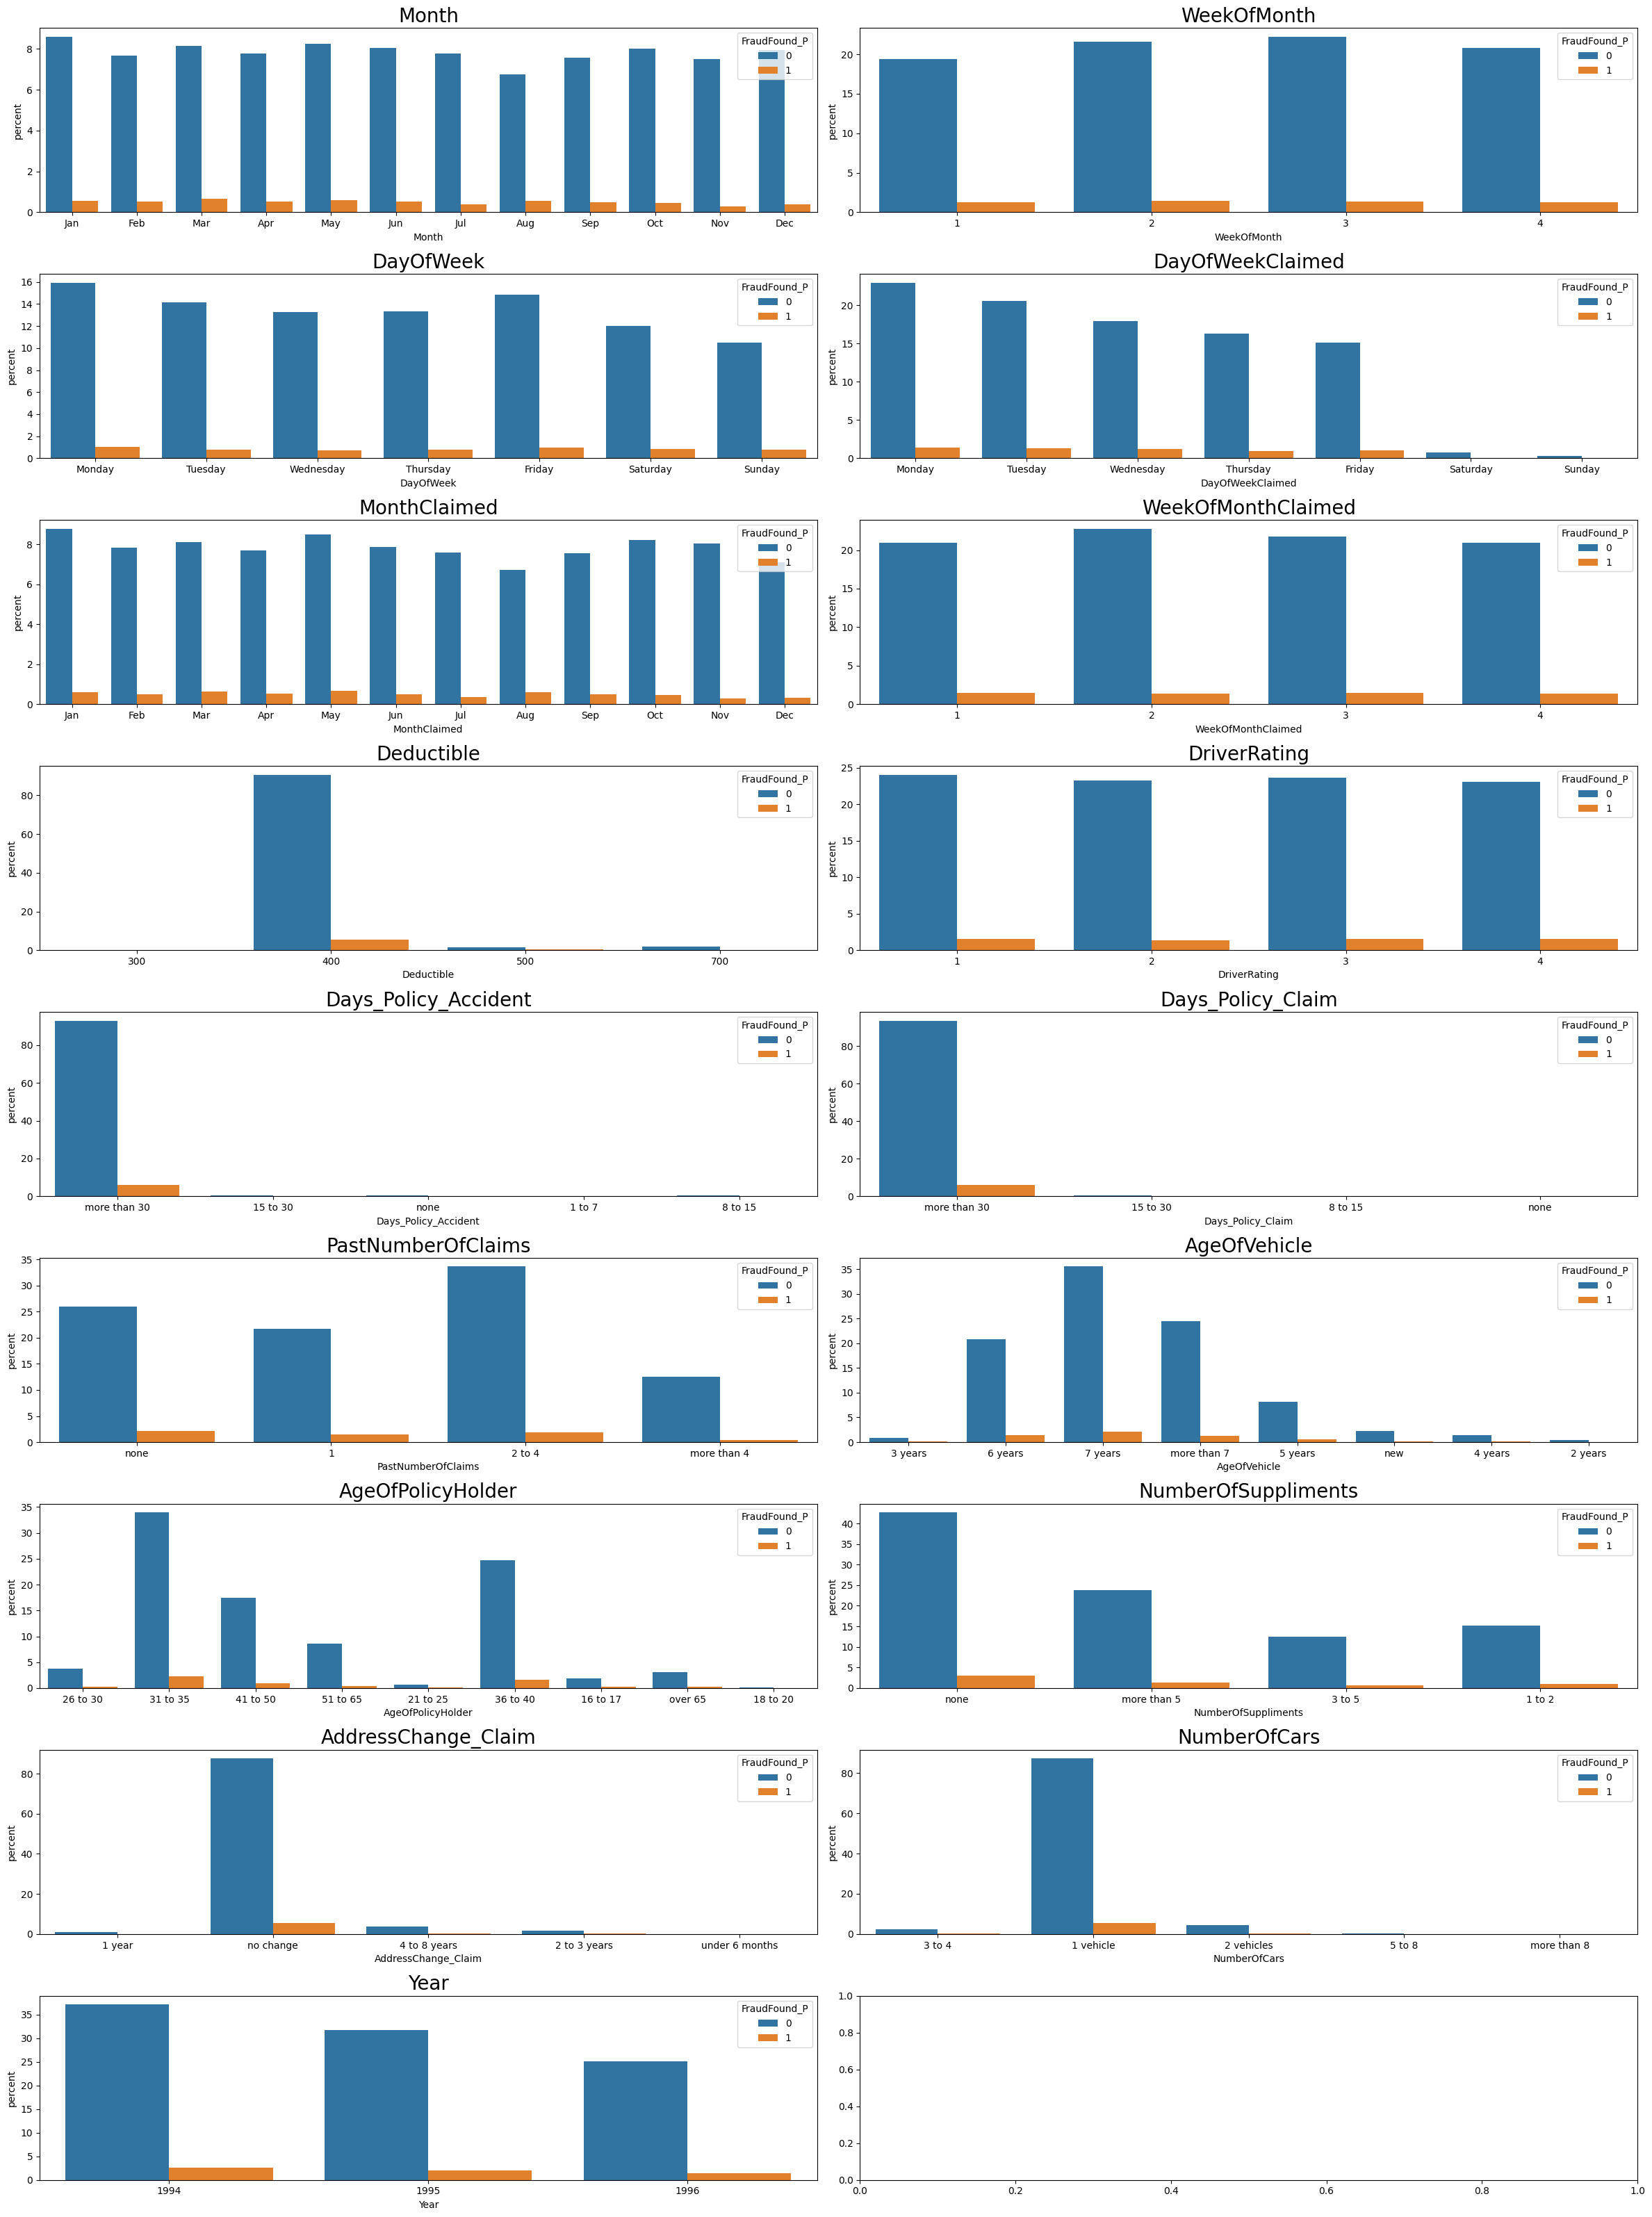

In [101]:
f, axes = plt.subplots(9, 2, figsize=(24, 32), sharex=False)
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov' , 'Dec']
week_order = [1,2,3,4]

for index, name in enumerate(ordinal):
    if name in ['DayOfWeek','DayOfWeekClaimed']:
        sns.countplot(x=name, hue= 'FraudFound_P', data=data,stat='percent', order = day_order, ax=axes[index//2,index%2])
    elif name in ['Month', 'MonthClaimed']:
        sns.countplot(x=name, hue= 'FraudFound_P', data=data,stat='percent', order = month_order, ax=axes[index//2,index%2])
    elif name in ['WeekOfMonth', 'WeekOfMonthClaimed']:
        sns.countplot(x=name, hue= 'FraudFound_P', data=data,stat='percent', order = week_order, ax=axes[index//2,index%2])
    else:
        sns.countplot(x=name, hue= 'FraudFound_P', data=data,stat='percent', ax=axes[index//2,index%2])
    axes[index//2,index%2].set_title(name, fontsize=20)
        # axes[index//2,index%2].set_xticklabels(axes[index//2,index%2].get_xticklabels(), rotation=60)
    
plt.tight_layout()

### Categorical (nominal) vs Continuous

In [102]:
# PolicyNumber is a irrelavant feature
data['PolicyNumber'].unique()

array([    1,     2,     3, ..., 15418, 15419, 15420], dtype=int64)

In [103]:
# data = data.drop(columns='PolicyNumber')

In [104]:
nominal = data.columns[(~data.columns.isin(ordinal)) & (~data.columns.isin(['Age', 'PolicyNumber', 'FraudFound_P']))].tolist()
nominal

['Make',
 'AccidentArea',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'RepNumber',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'BasePolicy']

In [105]:
cat_variables = nominal + ordinal
numerical_variables = ['Age']
cat_variables

['Make',
 'AccidentArea',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'RepNumber',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'BasePolicy',
 'Month',
 'WeekOfMonth',
 'DayOfWeek',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'WeekOfMonthClaimed',
 'Deductible',
 'DriverRating',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'Year']

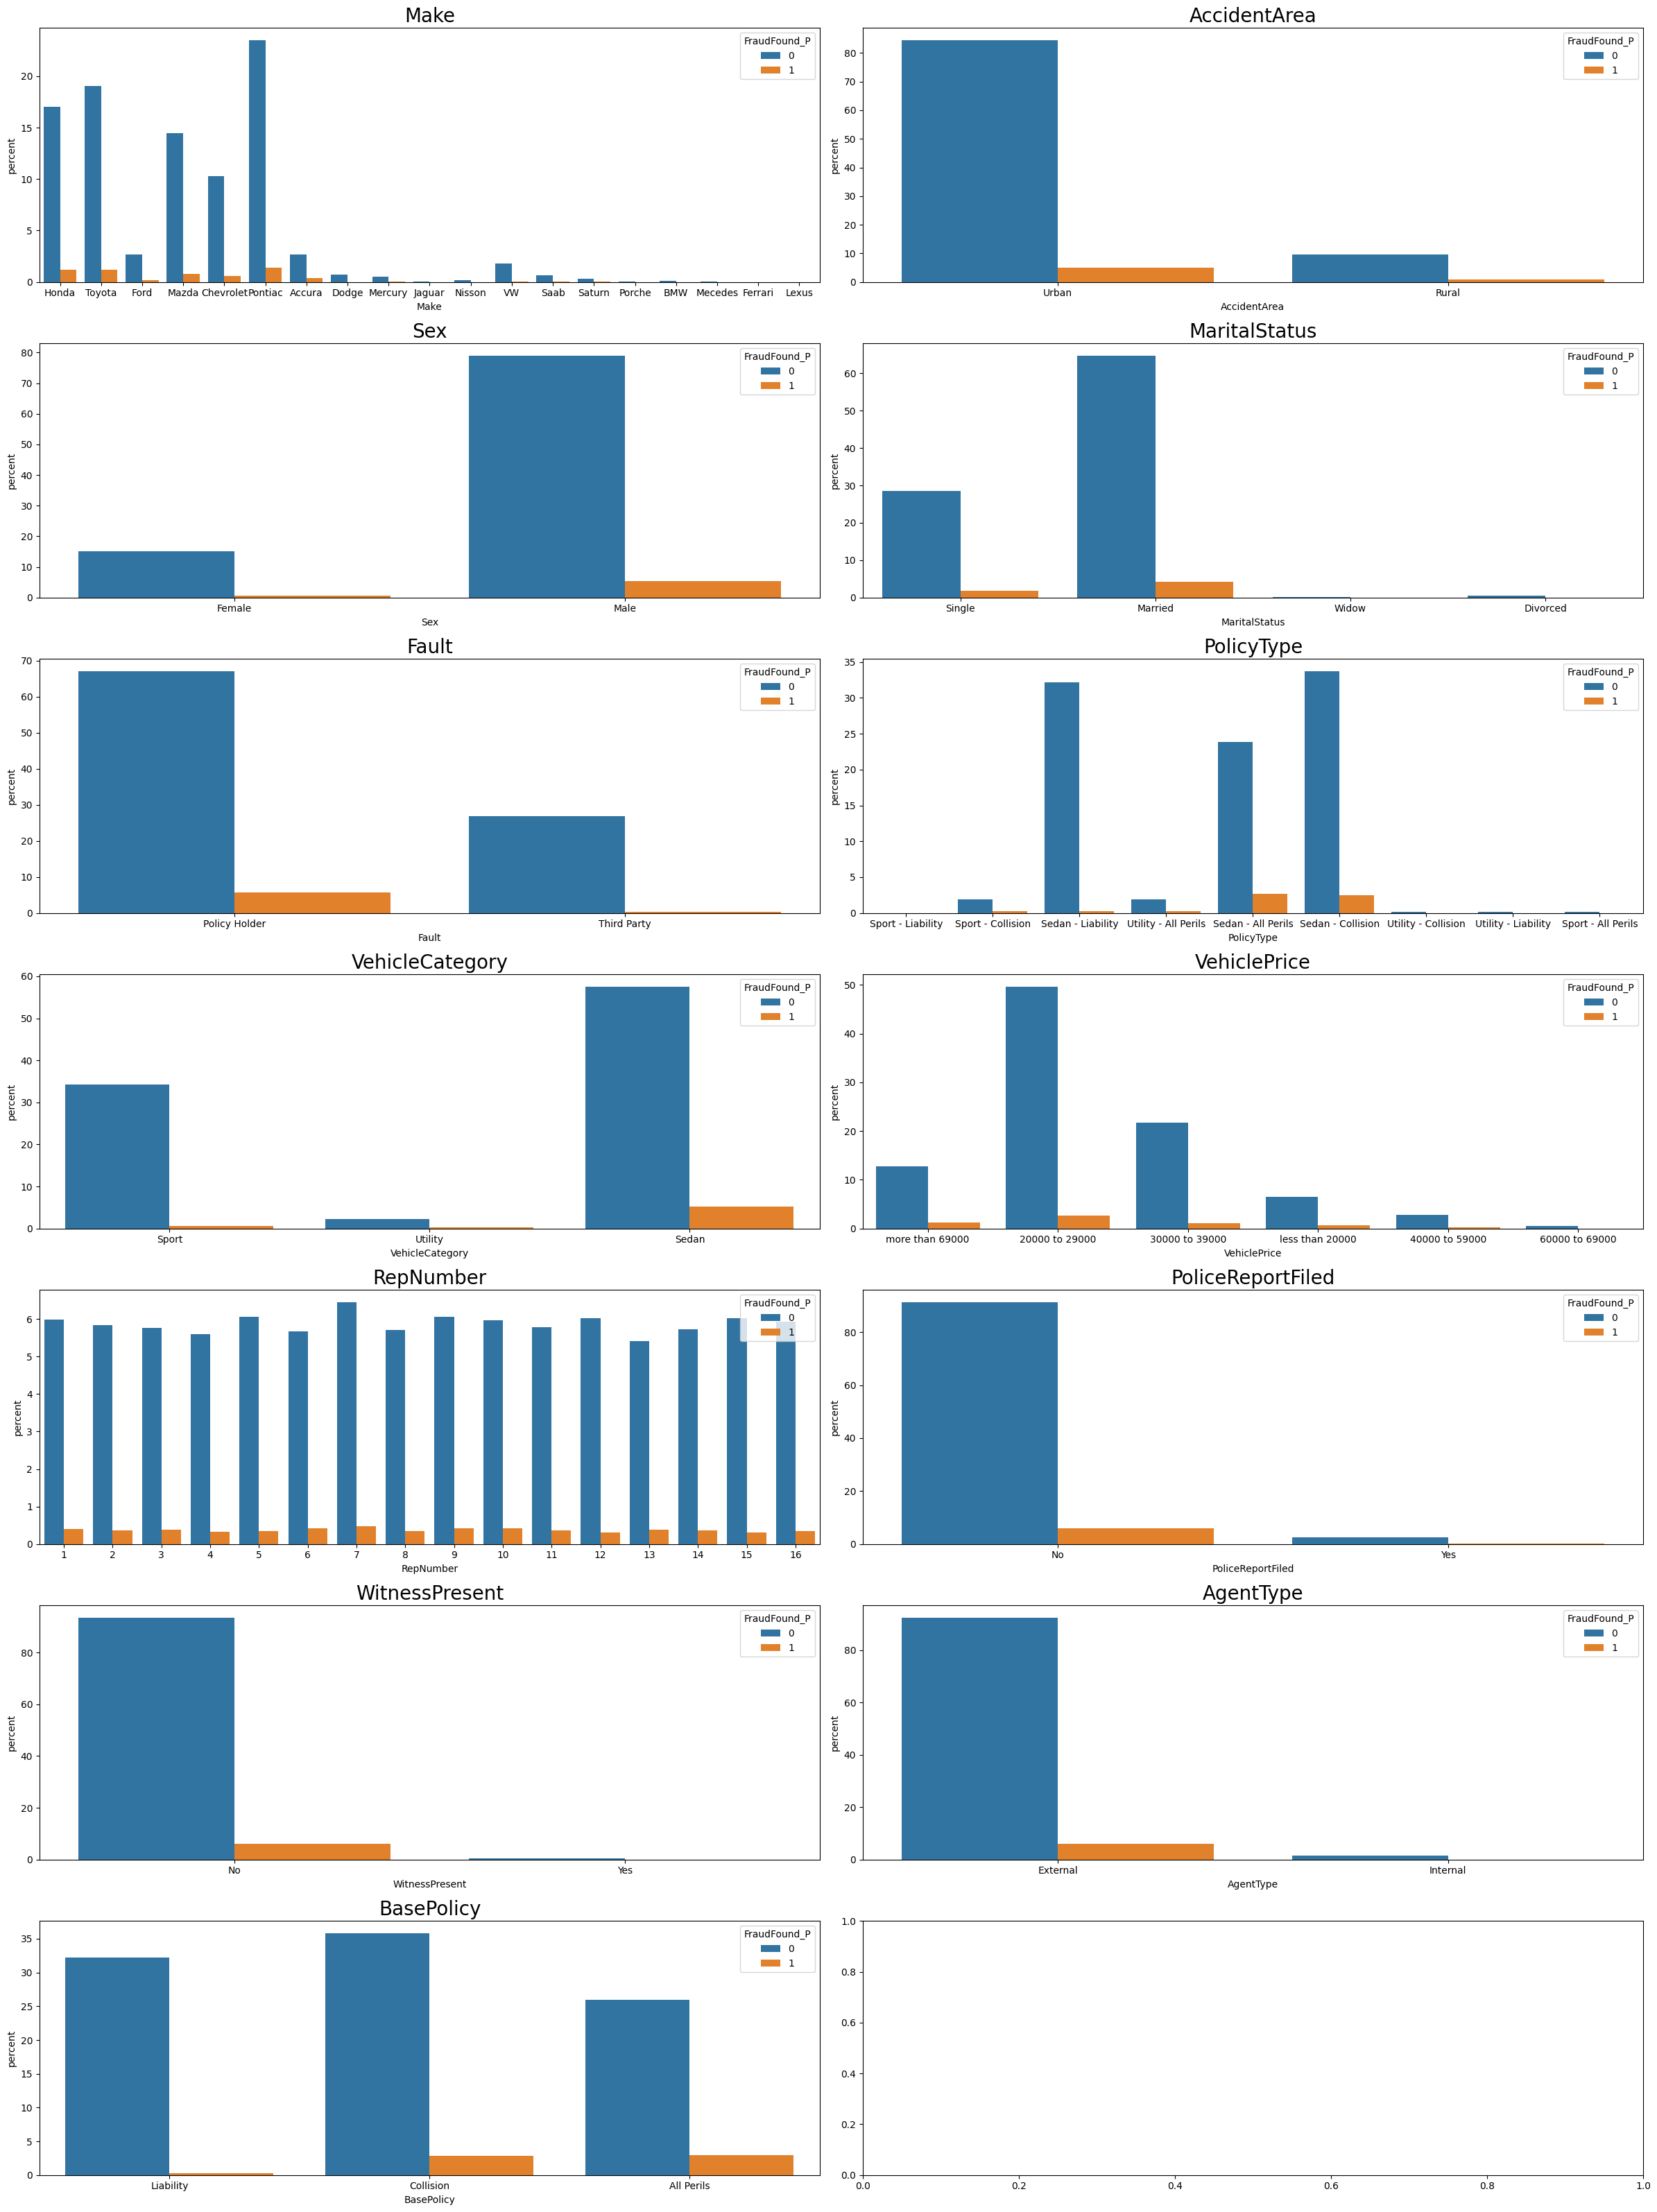

In [106]:
f, axes = plt.subplots(7, 2, figsize=(24, 32), sharex=False)

for index, name in enumerate(nominal):
    sns.countplot(x=name, data=data,hue= 'FraudFound_P',stat='percent', ax=axes[index//2,index%2])
    axes[index//2,index%2].set_title(name, fontsize=20)
    # axes[index//2,index%2].set_xticklabels(axes[index//2,index%2].get_xticklabels(), rotation=60)
    
plt.tight_layout()

### Categorical VS Categorical (only nominal)

In [107]:
# Compute Entropy
# entropy_columns = data.columns[(~data.columns.isin(['FraudFound_P']))]
def information_gain_plot(columns, data, title=""):
    entropy_columns = columns
    entropies = pd.DataFrame([(x, entropy(data[x].value_counts(normalize=True), base=2)) for x in entropy_columns], columns=['cat1', 'H(cat1)'])
    
    # Compute Conditional Entropy
    results = []
    for cat1 in entropy_columns:
        for cat2 in entropy_columns:
            if cat1 != cat2:
                h_cat1 = entropy(data[cat1].value_counts(normalize=True), base=2)
                h_cat1_cat2 = entropy(data.groupby([cat1, cat2]).size().div(len(data)), base=2)
                results.append((cat1, cat2, h_cat1_cat2 - h_cat1))
    
    conditional_entropy = pd.DataFrame(results, columns=['cat1', 'cat2', 'H(cat1|cat2)'])
    
    information_gain = entropies.merge(conditional_entropy)
    information_gain['information gain'] = information_gain['H(cat1)'] - information_gain['H(cat1|cat2)']

    information_gain.pivot_table(values='information gain', index='cat1', columns='cat2', aggfunc='sum')
    # information_gain.head()

    fig, ax = plt.subplots(1,1, figsize=(10,6))
    hm = sns.heatmap(round(information_gain.pivot_table(index='cat1', columns='cat2', values='information gain', aggfunc=np.sum),2), 
                     ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                     cmap="coolwarm", # Color Map.
                     #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                     annot=True, 
                     #annot_kws={"size": 14},
                     linewidths=.05)
    
    fig.subplots_adjust(top=0.93)
    
    t = fig.suptitle('Correlation Heatmap (Information Gain) '+title, fontsize=14, fontweight='bold')
    return t
    

C:\Users\chewz\AppData\Local\Temp\ipykernel_6856\3193816478.py:25: FutureWarning: The provided callable <function sum at 0x0000027948AC00E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  hm = sns.heatmap(round(information_gain.pivot_table(index='cat1', columns='cat2', values='information gain', aggfunc=np.sum),2),


Text(0.5, 0.98, 'Correlation Heatmap (Information Gain) nominal')

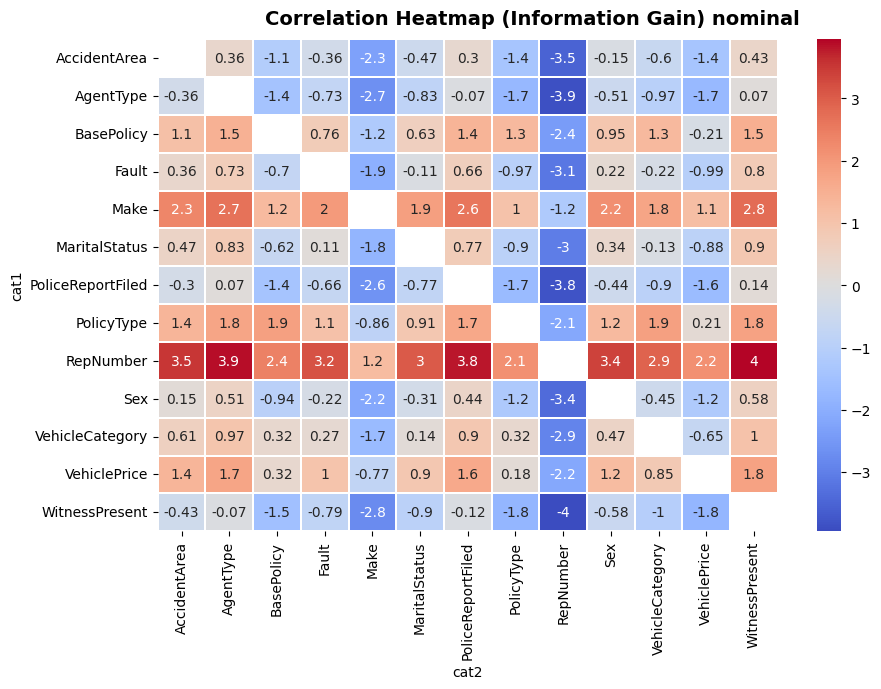

In [108]:
information_gain_plot(nominal, data, 'nominal')

C:\Users\chewz\AppData\Local\Temp\ipykernel_6856\3193816478.py:25: FutureWarning: The provided callable <function sum at 0x0000027948AC00E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  hm = sns.heatmap(round(information_gain.pivot_table(index='cat1', columns='cat2', values='information gain', aggfunc=np.sum),2),


Text(0.5, 0.98, 'Correlation Heatmap (Information Gain) ordinal')

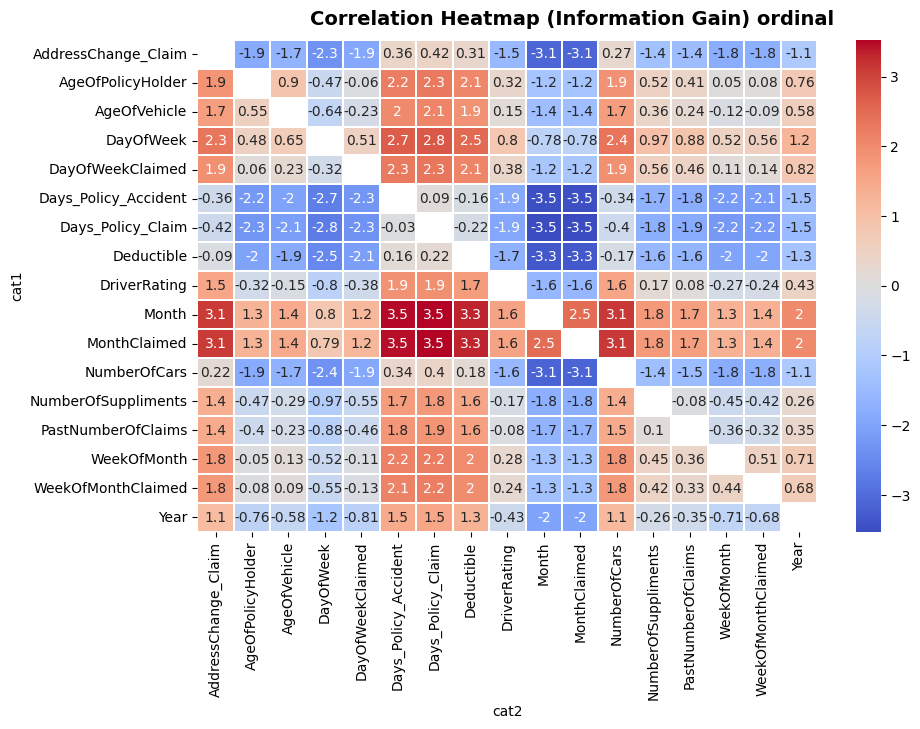

In [109]:
information_gain_plot(ordinal, data, 'ordinal')

In [110]:
data[['Month', 'MonthClaimed', 'DayOfWeekClaimed', 'Days_Policy_Claim', 'Deductible']]

,Month,MonthClaimed,DayOfWeekClaimed,Days_Policy_Claim,Deductible
0,Dec,Jan,Tuesday,more than 30,300
1,Jan,Jan,Monday,more than 30,400
2,Oct,Nov,Thursday,more than 30,400
3,Jun,Jul,Friday,more than 30,400
4,Jan,Feb,Tuesday,more than 30,400
...,...,...,...,...,...
15415,Nov,Nov,Tuesday,more than 30,400
15416,Nov,Dec,Friday,more than 30,400
15417,Nov,Dec,Friday,more than 30,400
15418,Dec,Dec,Thursday,more than 30,400


### Categorical v.s. Numerical (T test)

In [111]:
results = []

_, p_value = stats.ttest_ind(data[data['FraudFound_P'] == 0]['Age'], data[data['FraudFound_P'] == 1]['Age'])
results.append(('Age', p_value))

In [112]:
student_t = pd.DataFrame(results, columns=['Numerical', 'P-value'])
student_t['Categorical'] = 'FraudFound_P'
student_t['Value1'] = 0
student_t['Value2'] = 1
student_t = student_t[['Categorical', 'Value1', 'Value2', 'Numerical', 'P-value']]
student_t

,Categorical,Value1,Value2,Numerical,P-value
0,FraudFound_P,0,1,Age,0.000221


### Categorical v.s. Numerical (ANOVA)

In [113]:
results = []

for cat in cat_variables + ['FraudFound_P']:
    for num in numerical_variables:
        candidates = []
        for val in data[cat].unique():
            if len(data[data[cat]==val][num]) > 0:
                candidates.append(data[data[cat]==val][num])

        # Check that each array in candidates has more than one unique value
        if all(np.unique(c).size > 1 for c in candidates):
            _, p_val = stats.f_oneway(*candidates)
            results.append((cat, num, p_val))
        else:
            print (f'cannot compute P value for {cat} and {num}')

cannot compute P value for Make and Age
cannot compute P value for PolicyType and Age
cannot compute P value for DayOfWeekClaimed and Age
cannot compute P value for MonthClaimed and Age
cannot compute P value for Days_Policy_Claim and Age
cannot compute P value for AgeOfPolicyHolder and Age


In [114]:
Anova = pd.DataFrame(results, columns=['Numerical', 'Categorical', 'P-value'])
Anova = Anova.pivot_table(index='Numerical', columns='Categorical')
Anova['Less 0.05'] = Anova['P-value']<0.05
Anova['Conclusion'] = np.where(Anova['P-value']<0.05, 'Reject', 'Do not reject')
Anova

#null hypothesis: 

,P-value,Less 0.05,Conclusion
Categorical,Age,,
Numerical,,,
AccidentArea,3.072236e-01,False,Do not reject
AddressChange_Claim,5.063055e-01,False,Do not reject
AgeOfVehicle,0.000000e+00,True,Reject
AgentType,9.684293e-01,False,Do not reject
BasePolicy,2.635118e-33,True,Reject
DayOfWeek,1.767607e-02,True,Reject
Days_Policy_Accident,5.728399e-01,False,Do not reject
Deductible,1.530371e-17,True,Reject


#### Categorical v.s. Numerical (Logistic Regression)

In [115]:
clf_lr = LogisticRegression(max_iter=1000)
clf_lr.fit(data[numerical_variables], data['FraudFound_P'])
feature_importance = pd.DataFrame({'feature': numerical_variables, 'weight': clf_lr.coef_.squeeze()})
feature_importance

,feature,weight
0,Age,-0.009366


#### Categorical v.s. Numerical (Multivariate Logistics Regression)

In [116]:
def num_unique_values(column):
    return len(column.unique())

col_dummy = []
remaining = []
for column in data.columns:
    x = num_unique_values(data[column])
    print(column , " " , x)
    if column == 'FraudFound_P':
        continue
    if x <= 5:
        col_dummy.append(column)
    else:
        remaining.append(column)
col_dummy

Month   12
WeekOfMonth   5
DayOfWeek   7
Make   19
AccidentArea   2
DayOfWeekClaimed   8
MonthClaimed   13
WeekOfMonthClaimed   5
Sex   2
MaritalStatus   4
Age   66
Fault   2
PolicyType   9
VehicleCategory   3
VehiclePrice   6
FraudFound_P   2
PolicyNumber   15420
RepNumber   16
Deductible   4
DriverRating   4
Days_Policy_Accident   5
Days_Policy_Claim   4
PastNumberOfClaims   4
AgeOfVehicle   8
AgeOfPolicyHolder   9
PoliceReportFiled   2
WitnessPresent   2
AgentType   2
NumberOfSuppliments   4
AddressChange_Claim   5
NumberOfCars   5
Year   3
BasePolicy   3


['WeekOfMonth',
 'AccidentArea',
 'WeekOfMonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'VehicleCategory',
 'Deductible',
 'DriverRating',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'Year',
 'BasePolicy']

In [117]:
# data_with_dummies = pd.get_dummies(data, columns=data.columns[~data.columns.isin(['FraudFound_P'])])
data_with_dummies = pd.get_dummies(data, columns = col_dummy)

In [118]:
data_with_dummies

,Month,DayOfWeek,Make,DayOfWeekClaimed,MonthClaimed,Age,PolicyType,VehiclePrice,FraudFound_P,PolicyNumber,...,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,Year_1994,Year_1995,Year_1996,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,Dec,Wednesday,Honda,Tuesday,Jan,21,Sport - Liability,more than 69000,0,1,...,False,True,False,False,True,False,False,False,False,True
1,Jan,Wednesday,Honda,Monday,Jan,34,Sport - Collision,more than 69000,0,2,...,False,False,False,False,True,False,False,False,True,False
2,Oct,Friday,Honda,Thursday,Nov,47,Sport - Collision,more than 69000,0,3,...,False,False,False,False,True,False,False,False,True,False
3,Jun,Saturday,Toyota,Friday,Jul,65,Sedan - Liability,20000 to 29000,0,4,...,False,False,False,False,True,False,False,False,False,True
4,Jan,Monday,Honda,Tuesday,Feb,27,Sport - Collision,more than 69000,0,5,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,Friday,Toyota,Tuesday,Nov,35,Sedan - Collision,20000 to 29000,1,15416,...,False,False,False,False,False,False,True,False,True,False
15416,Nov,Thursday,Pontiac,Friday,Dec,30,Sedan - Liability,30000 to 39000,0,15417,...,False,True,False,False,False,False,True,False,False,True
15417,Nov,Thursday,Toyota,Friday,Dec,24,Sedan - Collision,20000 to 29000,1,15418,...,False,False,False,False,False,False,True,False,True,False
15418,Dec,Monday,Toyota,Thursday,Dec,34,Sedan - All Perils,20000 to 29000,0,15419,...,False,False,False,False,False,False,True,True,False,False


In [119]:
X = data_with_dummies.drop('FraudFound_P', axis=1)
X = X.drop(remaining, axis=1)
y = data_with_dummies['FraudFound_P']

In [120]:
clf_lr = LogisticRegression(max_iter=1000)
clf_lr.fit(X, y)
feature_importance = pd.DataFrame({'feature': X.columns, 'weight': clf_lr.coef_.squeeze()})
feature_importance

,feature,weight
0,WeekOfMonth_1,0.045750
1,WeekOfMonth_2,0.101594
2,WeekOfMonth_3,0.032897
3,WeekOfMonth_4,-0.083160
4,WeekOfMonth_5,-0.098837
...,...,...
65,Year_1995,-0.000047
66,Year_1996,-0.098135
67,BasePolicy_All Perils,1.485622
68,BasePolicy_Collision,0.946783


# Outlier Detection

### Univariate
Box plot

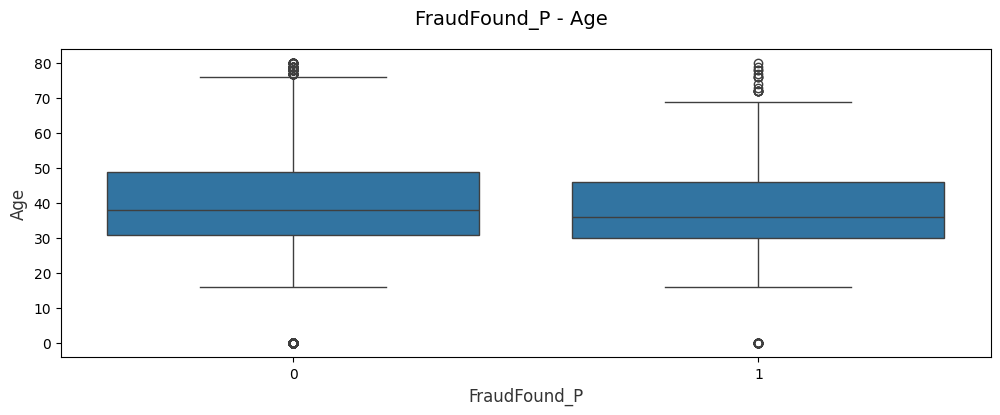

In [121]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('FraudFound_P - Age', fontsize=14)

sns.boxplot(x="FraudFound_P", y="Age", data=data,  ax=ax)
ax.set_xlabel("FraudFound_P",size = 12,alpha=0.8)
ax.set_ylabel("Age",size = 12,alpha=0.8);

#### Z-score distribution

Text(0, 0.5, 'Density')

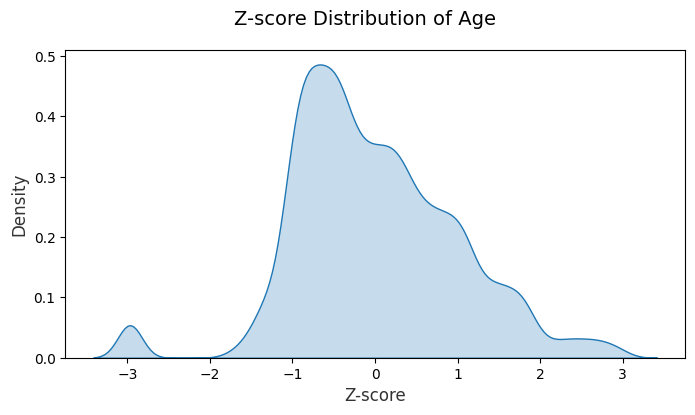

In [122]:
subset = data[data['FraudFound_P'] == 0][['Age']]
mean, std = subset.describe()['Age']['mean'], subset.describe()['Age']['std']
subset['z-score'] = (subset['Age'] - mean) / std

f, ax = plt.subplots(1, 1, figsize=(8, 4))
f.suptitle('Z-score Distribution of Age', fontsize=14)
sns.kdeplot(subset['z-score'], fill=True)
ax.set_xlabel("Z-score",size=12,alpha=0.8)
ax.set_ylabel("Density",size=12,alpha=0.8)

In [123]:
# No z-scores that are > 3
subset[abs(subset['z-score'])>3]

,Age,z-score


### Finding unique value for each feature

In [125]:
unique_value_df = {}
for column in data.columns:
    # print(column)
    if column == 'FraudFound_P':
        continue
    if data[column].dtype == 'object':
        type = 'string'
    else:
        type = data[column].dtype
    unique_value_df[column] = [data[column].astype(str).unique(), type, len(data[column].astype(str).unique())]
unique_value_df = pd.DataFrame(unique_value_df).T.reset_index().rename(columns={'index': 'Feature', 0: "Unique Values", 1: "Type", 2: 'Number of unique values'})
unique_value_df

# unique_value_df.to_csv('unique_value_per_feature.csv')

,Feature,Unique Values,Type,Number of unique values
0,Month,"[Dec, Jan, Oct, Jun, Feb, Nov, Apr, Mar, Aug, ...",string,12
1,WeekOfMonth,"[5, 3, 2, 4, 1]",int64,5
2,DayOfWeek,"[Wednesday, Friday, Saturday, Monday, Tuesday,...",string,7
3,Make,"[Honda, Toyota, Ford, Mazda, Chevrolet, Pontia...",string,19
4,AccidentArea,"[Urban, Rural]",string,2
5,DayOfWeekClaimed,"[Tuesday, Monday, Thursday, Friday, Wednesday,...",string,8
6,MonthClaimed,"[Jan, Nov, Jul, Feb, Mar, Dec, Apr, Aug, May, ...",string,13
7,WeekOfMonthClaimed,"[1, 4, 2, 3, 5]",int64,5
8,Sex,"[Female, Male]",string,2
9,MaritalStatus,"[Single, Married, Widow, Divorced]",string,4


In [127]:
print(data.groupby('DayOfWeekClaimed')['DayOfWeekClaimed'].count())
print(data.groupby('MonthClaimed')['DayOfWeekClaimed'].count())
print(len(data[data['Age']==0]))

DayOfWeekClaimed
0               1
Friday       2497
Monday       3757
Saturday      127
Sunday         52
Thursday     2660
Tuesday      3375
Wednesday    2951
Name: DayOfWeekClaimed, dtype: int64
MonthClaimed
0         1
Apr    1271
Aug    1126
Dec    1146
Feb    1287
Jan    1446
Jul    1225
Jun    1293
Mar    1348
May    1411
Nov    1285
Oct    1339
Sep    1242
Name: DayOfWeekClaimed, dtype: int64
320


### Handling outlier

In [128]:
# There are 320 claims with Age = 0 -> replace with mean of age
data_new = data.copy(deep=True)
data_new[['Age']] = data_new[['Age']].replace(0, round(statistics.mean(data_new['Age'])))

In [129]:
data_new['Age'].unique()

array([21, 34, 47, 65, 27, 20, 36, 40, 30, 42, 71, 52, 28, 61, 38, 41, 32,
       63, 31, 45, 60, 39, 55, 35, 44, 72, 29, 37, 59, 49, 50, 26, 48, 64,
       33, 74, 23, 25, 56, 16, 68, 18, 51, 22, 53, 46, 43, 57, 54, 69, 67,
       19, 78, 77, 75, 80, 58, 73, 24, 76, 62, 79, 70, 17, 66],
      dtype=int64)

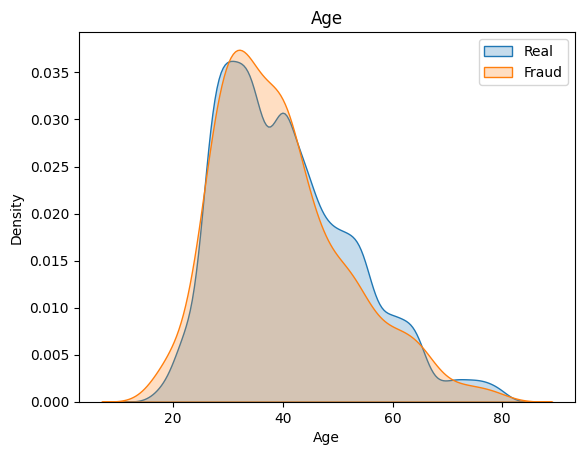

In [130]:
# Distribution of Age after removing outlier
ax = plt.gca()
ax.set_title('Age')

sns.kdeplot(data_new[data_new['FraudFound_P']== 0]['Age'], fill=True)
sns.kdeplot(data_new[data_new['FraudFound_P']== 1]['Age'], fill=True)
ax.legend(['Real', 'Fraud']);

### Removing outlier

In [131]:
# Only 1 claim removed 
data_new = data_new[data_new['DayOfWeekClaimed'] != '0']
data_new = data_new[data_new['MonthClaimed'] != '0']
print(len(data_new))

15419


In [132]:
data_new.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


# Changing feature values names

In [133]:
# Convert string values into numerical ranges

VehiclePrice_mapping = {
    'more than 69000': '>69000',          # OR [69000,float(inf)]
    '20000 to 29000': [20000, 29000],
    '30000 to 39000': [30000, 39000],
    'less than 20000': '<20000',
    '40000 to 59000': [40000, 59000],
    '60000 to 69000': [60000, 69000]
}
data_new['VehiclePrice'] = data_new['VehiclePrice'].map(VehiclePrice_mapping)

Days_Policy_Accident_mapping = {
    'more than 30': '>30',
    '15 to 30': [15, 30],
    'none': 0,
    '1 to 7': [1, 7],
    '8 to 15': [8, 15]
}
data_new['Days_Policy_Accident'] = data_new['Days_Policy_Accident'].map(Days_Policy_Accident_mapping)


Days_Policy_Claim_mapping = {
    'more than 30': '>30',
    '15 to 30': [15, 30],
    '8 to 15': [8, 15],
    'none': 0
}
data_new['Days_Policy_Claim'] = data_new['Days_Policy_Claim'].map(Days_Policy_Claim_mapping)

PastNumberOfClaims_mapping = {
    'none': 0,
    '1': 1,
    '2 to 4': [2, 4],
    'more than 4': '>4'
}
data_new['PastNumberOfClaims'] = data_new['PastNumberOfClaims'].map(PastNumberOfClaims_mapping)

AgeOfVehicle_mapping = {
    '3 years': 3,
    '6 years': 6,
    '7 years': 7,
    'more than 7': '>7',
    '5 years': 5,
    'new': '<3',
    '4 years': 4,
    '2 years': 2
}
data_new['AgeOfVehicle'] = data_new['AgeOfVehicle'].map(AgeOfVehicle_mapping)

AgeOfPolicyHolder_mapping = {
    '26 to 30': [26, 30],
    '31 to 35': [31, 35],
    '41 to 50': [41, 50],
    '51 to 65': [51, 65],
    '21 to 25': [21, 25],
    '36 to 40': [36, 40],
    '16 to 17': [16, 17],
    'over 65': '>65',
    '18 to 20': [18, 20]
}
data_new['AgeOfPolicyHolder'] = data_new['AgeOfPolicyHolder'].map(AgeOfPolicyHolder_mapping)

NumberOfSuppliments_mapping = {
    'none': 0,
    'more than 5': '>5',
    '3 to 5': [3, 5],
    '1 to 2': [1, 2]
}
data_new['NumberOfSuppliments'] = data_new['NumberOfSuppliments'].map(NumberOfSuppliments_mapping)

AddressChange_Claim_mapping = {
    '1 year': [1,2],
    'no change': 0,
    '4 to 8 years': [4, 8],
    '2 to 3 years': [2, 3],
    'under 6 months': [0,0.5]
}
data_new['AddressChange_Claim']= data_new['AddressChange_Claim'].map(AddressChange_Claim_mapping)

NumberOfCars_mapping = {
    '3 to 4': [3, 4],
    '1 vehicle': 1,
    '2 vehicles': 2,
    '5 to 8': [5, 8],
    'more than 8': '>8'
}
data_new['NumberOfCars']= data_new['NumberOfCars'].map(NumberOfCars_mapping)

# Convert string month names to numerical form
month_mapping = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 0
}

data_new['Month'] = data_new['Month'].map(month_mapping) 
data_new['MonthClaimed'] = data_new['MonthClaimed'].map(month_mapping)
data_new['DayOfWeek'] = data_new['DayOfWeek'].map(day_mapping)
data_new['DayOfWeekClaimed'] = data_new['DayOfWeekClaimed'].map(day_mapping)



In [134]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15419 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15419 non-null  int64 
 1   WeekOfMonth           15419 non-null  int64 
 2   DayOfWeek             15419 non-null  int64 
 3   Make                  15419 non-null  object
 4   AccidentArea          15419 non-null  object
 5   DayOfWeekClaimed      15419 non-null  int64 
 6   MonthClaimed          15419 non-null  int64 
 7   WeekOfMonthClaimed    15419 non-null  int64 
 8   Sex                   15419 non-null  object
 9   MaritalStatus         15419 non-null  object
 10  Age                   15419 non-null  int64 
 11  Fault                 15419 non-null  object
 12  PolicyType            15419 non-null  object
 13  VehicleCategory       15419 non-null  object
 14  VehiclePrice          15419 non-null  object
 15  FraudFound_P          15419 non-null  int

In [135]:
# Create a datetime column
def calculate_date(row):
    year = int(row['Year'])
    month = int(row['Month'])
    first_day = datetime.date(year, month, 1)
    first_weekday = first_day.weekday()  # 0 (Monday) to 6 (Sunday)

    target_weekday = int(row['DayOfWeek'])
    target_week = int(row['WeekOfMonth'])

    # Calculate the difference between the target weekday and the first weekday of the month
    weekday_diff = (target_weekday - first_weekday) % 7

    # Calculate the number of days to add to the first day of the month
    days_to_add = weekday_diff + (target_week - 1) * 7

    result_date = first_day + relativedelta(days=+days_to_add)

    return result_date

data_new['Date'] = data_new.apply(calculate_date, axis=1)

In [136]:
# Create a datetime column
def calculate_date2(row):
    year = int(row['Year'])
    month = int(row['MonthClaimed'])
    first_day = datetime.date(year, month, 1)
    first_weekday = first_day.weekday()  # 0 (Monday) to 6 (Sunday)

    target_weekday = int(row['DayOfWeekClaimed'])
    target_week = int(row['WeekOfMonthClaimed'])

    # Calculate the difference between the target weekday and the first weekday of the month
    weekday_diff = (target_weekday - first_weekday) % 7

    # Calculate the number of days to add to the first day of the month
    days_to_add = weekday_diff + (target_week - 1) * 7

    result_date = first_day + relativedelta(days=+days_to_add)

    return result_date

data_new['DateClaimed'] = data_new.apply(calculate_date2, axis=1)

In [137]:
data_new['Date_Diff'] = (pd.to_datetime(data_new['DateClaimed']) - pd.to_datetime(data_new["Date"])).dt.days

In [139]:
data_new.sample(5)[['Month', 'WeekOfMonth', 'DayOfWeek', 'MonthClaimed', 'WeekOfMonthClaimed', 'DayOfWeekClaimed', 'Year', 'Date', 'DateClaimed', 'Date_Diff']]

,Month,WeekOfMonth,DayOfWeek,MonthClaimed,WeekOfMonthClaimed,DayOfWeekClaimed,Year,Date,DateClaimed,Date_Diff
8756,2,2,5,2,2,1,1995,1995-02-11,1995-02-14,3
4772,11,1,0,11,1,1,1994,1994-11-07,1994-11-01,-6
5668,12,5,4,1,4,5,1994,1994-12-30,1994-01-22,-342
13193,3,3,1,3,4,1,1996,1996-03-19,1996-03-26,7
8434,10,3,0,10,3,2,1995,1995-10-16,1995-10-18,2


In [140]:
# data_new.to_excel('data_new.xlsx', index=False)